# Lab 3 - Tree-based Learning: Classifiying Particle Physics Data

In this lab, you will learn to:
* Build a decision tree manually
* Build a classifer using random forest with sklearn
* Visualize decision trees
* Build regression model using random forest
* Learn about additional performance metrics and hyper-parameter tuning. 
* Build a classifier for particle physics data

Authors: Tuan Do & Bernie Boscoe

Latest Revision: Tuan Do

In [284]:
NAME = "Michael Tran"
COLLABORATORS = "Junnuo Zhu, Ryan Whitford, Jaden Mak"

In [2]:
# put your imports here
import numpy as np
import pandas as pd
import pylab as plt

# I moved all imports here for ease of access
from sklearn.datasets import load_iris
from sklearn import tree, model_selection, ensemble
from sklearn.datasets import load_digits
from sklearn import metrics
import seaborn as sns

# Part A - Building a decision tree by hand

From Question 2 from Chapter 4 of Kelleher 


A convicted criminal who reoffends after release is known as a recidivist. The table below lists a dataset that describes prisoners released on parole, and whether they reoffended within two years of release. This dataset lists six instances where prisoners were granted parole. Each of these instances are described in terms of three binary descriptive features. (GOOD BEHAVIOR, AGE ă 30, DRUG DEPENDENT) and a binary target feature, RECIDIVIST. The GOOD BEHAVIOR feature has a value of true if the prisoner had not committed any infringements during incarceration, the AGE ă 30 has a value of true if the prisoner was under 30 years of age when granted parole, and the DRUG DEPENDENT feature is true if the prisoner had a drug addiction at the time of parole. The target feature, RECIDIVIST, has a true value if the prisoner was arrested within two years of being released; otherwise it has a value of false.


<img src="table.png" alt="drawing" width="600"/>

Note: This example of predicting recidivism is based on a real application of machine learning: parole boards do rely on machine learning prediction models to help them when they are making their decisions. See Berk and Bleich (2013) for a recent comparison of different machine learning models used for this task. Datasets dealing with prisoner recidivism are available online, for exam- ple: catalog.data.gov/dataset/prisoner-recidivism/. The dataset presented here is not based on real data.


### Part A1

### Question 1
(5 pts)

Using this dataset, construct the decision tree that would be generated by the ID3 algorithm, using entropy-based information gain. Show your calculations for information gain and draw your final tree. Hint: follow the example in 4.3.1 in Kelleher. Note, you can upload a separate PDF for this question if you would like to draw or calculate on paper. 

See the attached PDF on Canvas

### Part A2

### Question 2
(1 pt)

What prediction will the decision tree generated in part 1.1 return for the following query?
GOOD BEHAVIOR = false,AGE < 30 = false, DRUG DEPENDENT = true

True, the outcome is not dependent on good behavior, starts at age, then checks drug dependency since age < 30 = false. Since drug dependency is true, returns true

### Part A3

### Question 3

(1 pt)

What prediction will the decision tree generated in part 1.1 predict for the following query?

GOOD BEHAVIOR = true,AGE < 30 = true, DRUG DEPENDENT = false

True, sees Age < 30 is true and terminates, returning true.

### Part A4 

### Question 4
(1 pt)

Discuss why this decision tree might lead to biases in inferences about recividism.

The decision tree does not include the impact of good behavior on recividism, which means that an outsider may believe that a prisoner's good behavior in prison has no impact on the choices they will make outside.

# Part B - Classify irises with a decision tree

Here, we'll repeat the iris classification problem with a decision tree using continuous features. We'll also be using the sklearn decision tree classifier.  


In [154]:
# load the data and the module to visualize decision trees
from sklearn.datasets import load_iris
from sklearn import tree, model_selection, ensemble


## B1 Building a decision tree with 2 features



## Question 5

(1 pt)

Load the iris data set. Let's start by using only **2 features: sepal length and width**


In [155]:
# enter code here, hint: use your code from  your previous labs to load the iris dataset
iris = load_iris()
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], 
                  columns = iris['feature_names'] + ['target'])
df.dropna()

data = df[['sepal width (cm)', 'sepal length (cm)']].to_numpy()
targets = df['target'].to_numpy()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


**Split the data into training and testing data**

In [156]:
# # Run this code to randomly shuffle the data and make train and validation splits

x_train_all, x_validate, y_train_all, y_validate = model_selection.train_test_split(data, targets, test_size=0.1)

# now split the training data further into training and testing
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x_train_all, y_train_all, test_size=0.2)

# enter code here

## Question 6
(2 pts)

**Load the classifier**

See the sklearn documentation for more info: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [157]:
# load the classifier
clf = tree.DecisionTreeClassifier()

**Train the classifier**

In [40]:
# enter your code here

In [158]:
clf.fit(X_train,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


**Visualize your decision tree.** Sklearn has a nice function called tree.plot_tree that will plot the tree you created. 

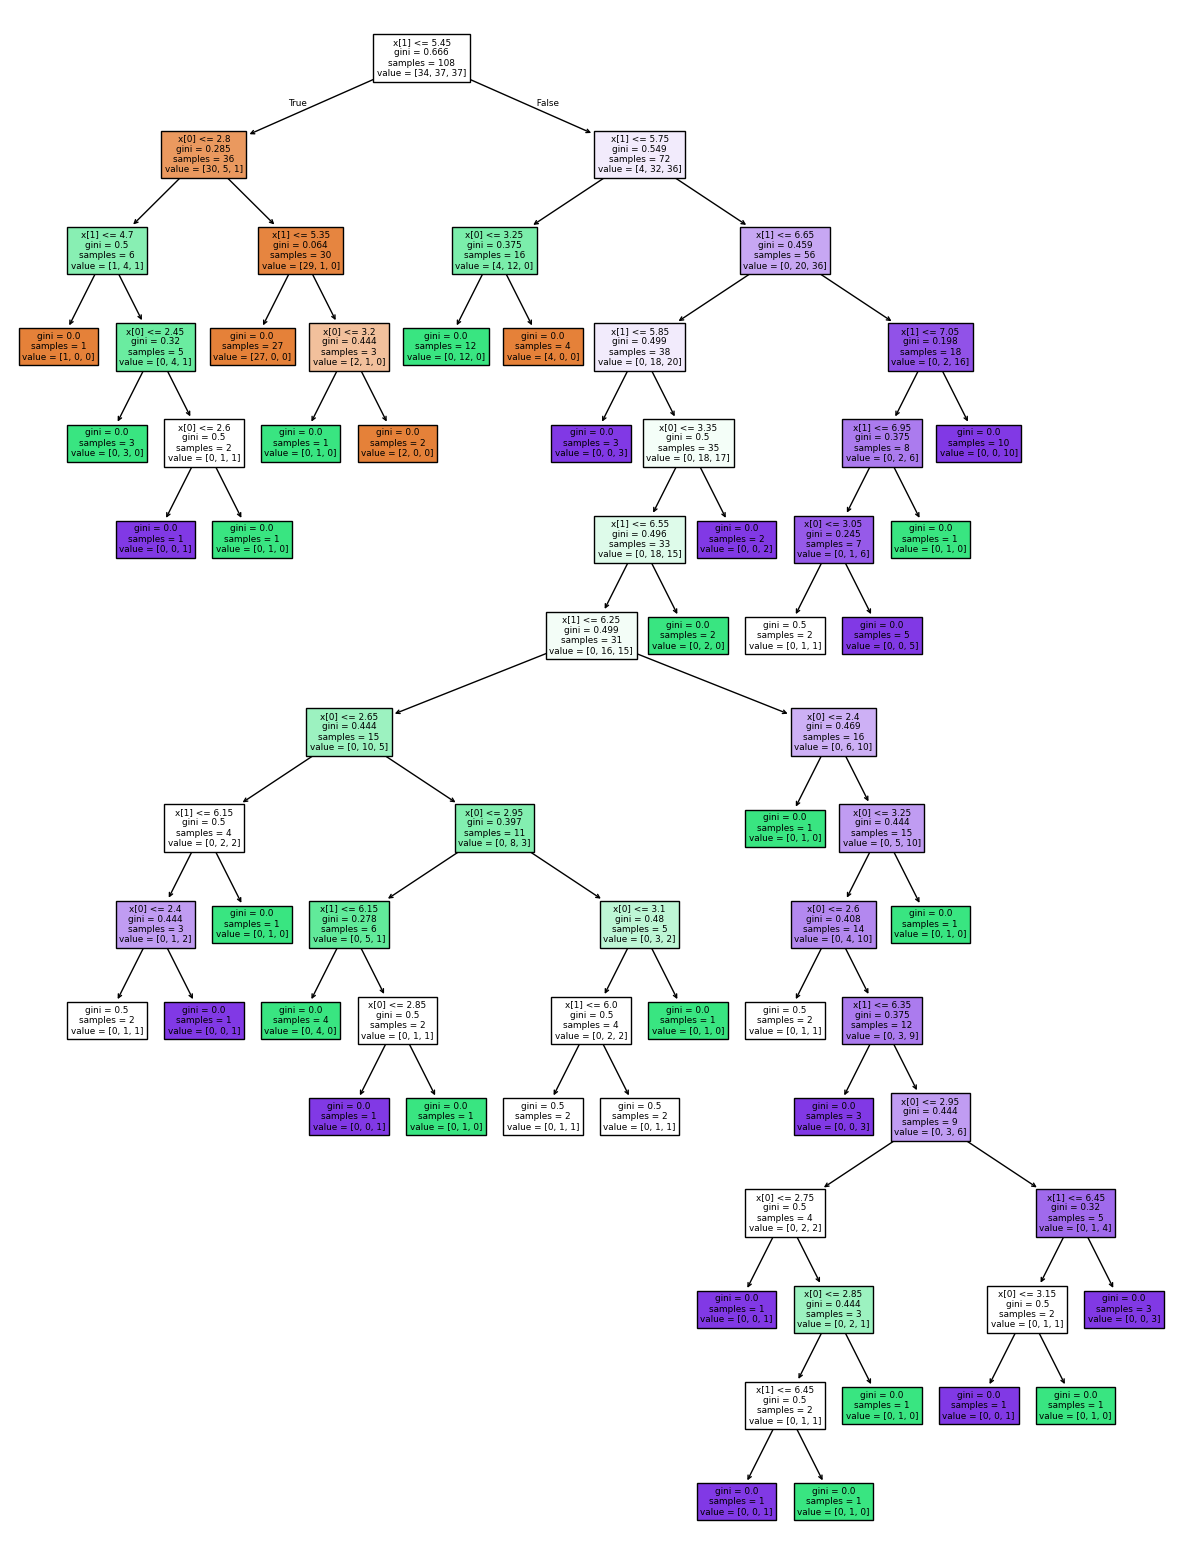

In [159]:
# visualize the tree that was created
plt.figure(figsize=(15,20))
t = tree.plot_tree(clf,filled=True)

## Question 7
(2 pts)

Describe the tree that you created. **Where which feature did the root node use to split? Why? How deep is it? Why is it that deep?**

The root node of the tree checks if the sepal width is less than 5.5 cm, it chose this feature and conditional because it lowers the information entropy of the dataset the most. The tree is 15 nodes deep, and is most likeley extremely deep due to the continuous data set in both features, as well as the "large" amount of data.

Test the classifier using the **accuracy score**.

In [160]:
# enter your code here
clf.score(X_test, Y_test)

0.6296296296296297

**Visualization:** we can visualize how different pairs of iris features would give in terms of their classification in the iris problem. **Run the code cell below to see this decision surface for different pairs of features.** 

/tmp/ipykernel_108/1378001726.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_108/1378001726.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_108/1378001726.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_108/1378001726.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_108/1378001726.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],


(np.float64(0.0),
 np.float64(7.88),
 np.float64(-0.9),
 np.float64(3.4800000000000044))

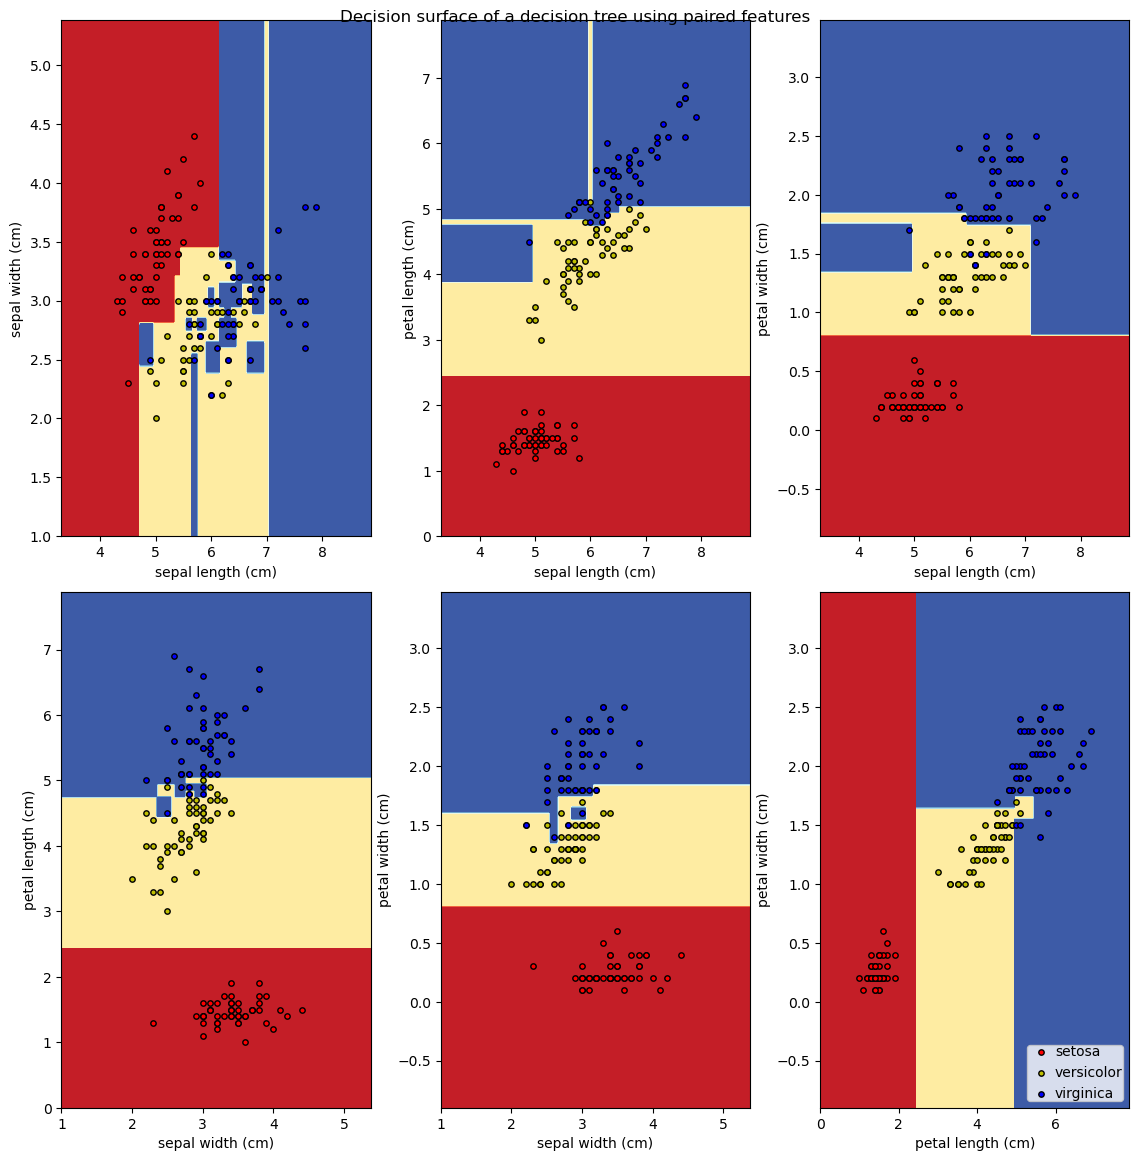

In [161]:

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()
plt.figure(figsize=(12,12))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

## Question 8
(1 pt)

Based on the plot above, **identify some regions where overfitting is occurring.**

Enter your answer in this markdown cell

Some of the overfitting is occuring in the sepal width, sepal length and sepal length, petal length regions. This can be seen in the tree's classification of points deep in the virginica region as versicolor and vice versa.

## Question 9
(2 pt)

By default, the decision tree can be too deep, which can make it overfit. **Recreate the classifier and use the keyword ``max_depth`` in the ``DecisionTreeClassifier`` object to specify a depth for your tree. Try refitting the data. Does your accuracy score improve?**

In [162]:
# your code here
clf2 = tree.DecisionTreeClassifier(max_depth = 5)
clf2.fit(X_train,Y_train)
clf2.score(X_test, Y_test)

#Yes accuracy score improves!

0.6666666666666666

## B2 Building a decision tree with all features

## Question 10
(4 pts)

Now that you have a sense of how the decision tree works with sklearn, **build a decision tree to classify 
irises using all the features and test it.** 

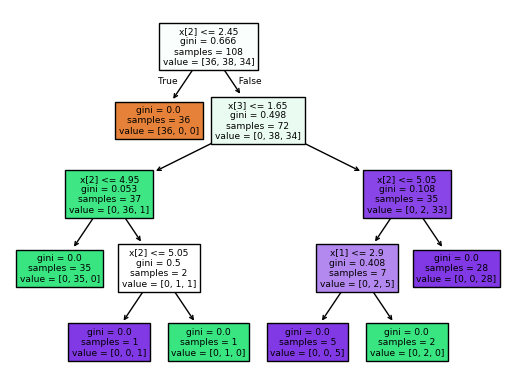

In [163]:
# your code here
features = df.drop("target", axis = 1).to_numpy()
targets = df['target'].to_numpy()

x_train_all, x_validate, y_train_all, y_validate = model_selection.train_test_split(features, targets, test_size=0.1)

# now split the training data further into training and testing
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x_train_all, y_train_all, test_size=0.2)

clf3 = tree.DecisionTreeClassifier(max_depth = 7)
clf3.fit(X_train, Y_train)
clf3.score(X_test, Y_test)
t = tree.plot_tree(clf3,filled=True)

## Question 11
(4 pts)

Based on your new tree, answer the following questions:
    
- **What feature does this tree split on? Why?**
- **What is your new accuracy score?**
- **Examine whether your score improves by changing ``max_depth``.** 
- By default, the classifer uses the Gini index to split the nodes. **What happens if you use information entropy instead?**

In [175]:
# your answers here
"""
The root splits on checking if the petal length <= 2.45 cm due to that conditional having the largest gini score.
"""
print(f"The new accuracy score is {round(clf3.score(X_test, Y_test) * 100, 3)}%.")

The new accuracy score is 92.593%.


In [185]:
clf4 = tree.DecisionTreeClassifier(max_depth = 3)
clf4.fit(X_train, Y_train)

"""
Accuracy score can improve with a smaller max_depth
"""
print(f"With the gini criterion and a max depth of 3, the accuracy is {round(clf4.score(X_test, Y_test) * 100, 3)}%.")

With the gini criterion and a max depth of 3, the accuracy is 100.0%.


In [216]:
clf5 = tree.DecisionTreeClassifier(max_depth = 7, criterion = 'entropy')
clf5.fit(X_train, Y_train)

'''
By using entropy instead, the accuracy score seems to remain 
approximately the same as the model using the Gini index to split nodes.
'''
score = round(clf5.score(X_test, Y_test) * 100, 3)
print(f"With the entropy criterion and a max depth of 7, the accuracy is {score}%.")

With the entropy criterion and a max depth of 7, the accuracy is 83.333%.


# Part C - Classify handwritten digits with random forest

As discussed in lecture and readings, usually we will not make just one decision tree, but rather use an emsemble of them called a random forest. Random forests have many applications and can even be used for image recognition. In this part, we will examine how we could use random forest to classifiy handwritten digits using another classic machine learning dataset. 

This dataset is called MNIST and is used to test many machine learning models (for more information, see http://yann.lecun.com/exdb/mnist/). We'll use our usual framework for an ML workflow for this part.

## C1 Big Picture  

Optical character recognition (OCR) is a very common machine learning task that is used to digitize handwriting. There is a lot of variation in how people write, but the number of possible characters is fairly small, so it is a well defined task. For this part of the lab, we'll try to identify numbers, which means there will be 10 classes (zero to nine). 

## C2 Get the data

In [186]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys() # the data is in the form of a dictionary, this will let you see the keys

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## C3 Explore the data


## Question 12
(2 pts)

Check the shape, and head, plot, visualize, and have a look at the data with whatever ways you think will help your task. Comment throughout on observations. There is some code below to look at some sample of digits

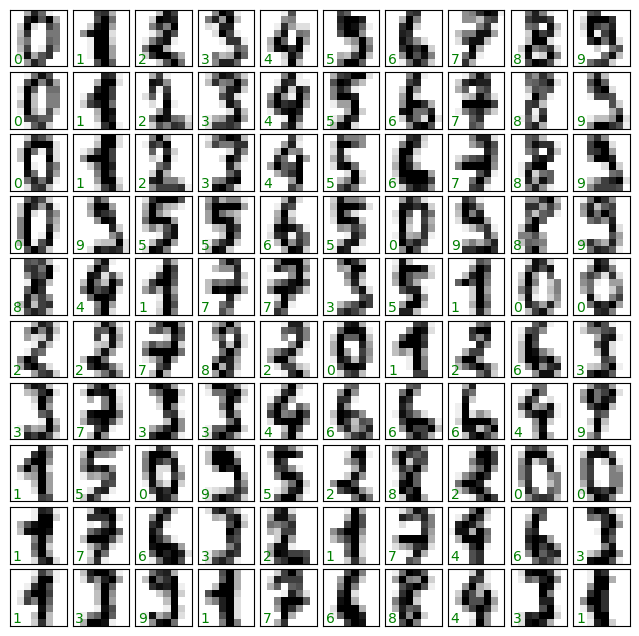

In [187]:
# We can display some of the digits to see what they look like
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Digits look like garbled messes yet remain slightly recognizable. The data set resolution seems to be very minimal

In [190]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [199]:
print(f"The shape of the data array is {digits['data'].shape}.")
print(digits['data'])

The shape of the data array is (1797, 64).
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


## C4 Prepare Data

For this assignment, the data is already prepared and is part of the digits dictionary. No need to do anything else for this part.

## C5 Select model and train


## Question 12
(6 pts)

Here, we'll be using the pixels as features and the digit as the target. We will use the random forest classifier from sklearn to model the data. 

Remember, in this part, you'll need to :

- Split the data into training, validation, and testing
- Build a random forest classifier 
- Train the classifier 


In [200]:
# your code here
x_train_all, x_validate, y_train_all, y_validate = model_selection.train_test_split(digits['data'], digits['target'], test_size=0.1)

# now split the training data further into training and testing
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x_train_all, y_train_all, test_size=0.2)

clf_digi = ensemble.RandomForestClassifier()
clf_digi.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Performance / evaluation metrics

## Question 13
(6 pts)

We have mainly been using **accuracy score** as a metric for classification, but that is just one measure of how well our predictions are. For this part, let's compute some additional metrics.

- First, compute the accuracy score of your random forest classifier. 
- Compute the confusion matrix and plot it (see lab 1)
- Learn about and compute another classification metric in sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

The accuracy score of the random forest is approximately 97.222%.


Text(50.722222222222214, 0.5, 'Actual')

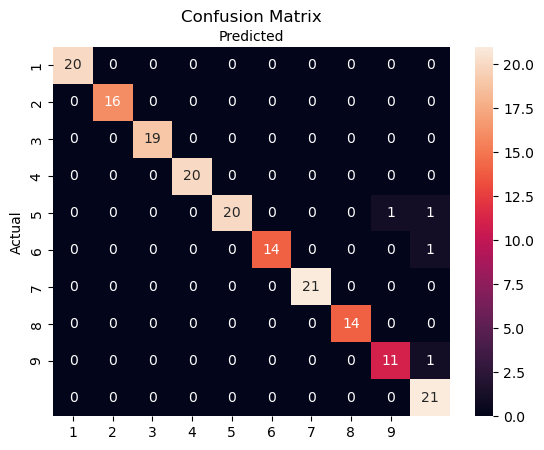

In [203]:
print(f"The accuracy score of the random forest is approximately {round(clf_digi.score(X_test, Y_test) * 100, 3)}%.")

cm = metrics.confusion_matrix(clf_digi.predict(x_validate), y_validate)

sns.heatmap(cm, annot = True, xticklabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
            yticklabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.gca().xaxis.set_label_position('top')
plt.ylabel('Actual')

## 3.6 Fine tune model


## Question 14
(6 pts)

The random forest classifier has many hyper-parameters to tune that can make your classification better. Here, you'll conduct some systematic experiments in tuning hyper-parameters to see how they affect the model performance. 

- First, read the documentation for the random forest classifier to see the different hyper-parameters https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Pick one of the hyper-parameters to tune (some examples are: ``n_estimators``, ``max_depth``, ``min_samples_leaf``, ``max_leaf_nodes``)
- Systematically vary one of these hyper-parameters and record your performance metric (for example accuracy score). Plot this relationship. 
- If you want to search multiple parameters in a grid, sklearn also has a wrapper function that is very useful called ``GridSearchCV`` https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- Discuss the results of your experiments

In [205]:
#clf_digi.get_params()
clf_search = ensemble.RandomForestClassifier()
paramGrid = {
"n_estimators": np.arange(1, 201).tolist(),
"max_depth": np.arange(5, 16).tolist(),
"min_samples_leaf": np.arange(10, 51).tolist(),
"max_leaf_nodes": np.arange(10, 101).tolist()
}
grid_search = model_selection.RandomizedSearchCV(estimator = clf_search,
                                                 param_distributions = paramGrid,
                                                 cv = 2, n_jobs = 1)
grid_search.fit(X_train, Y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")

Best hyperparameters: {'n_estimators': 129, 'min_samples_leaf': 20, 'max_leaf_nodes': 16, 'max_depth': 6}
Best accuracy: 0.9164708753427345


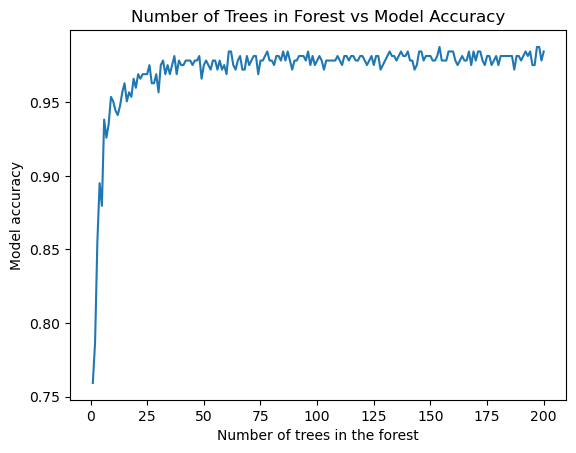

In [206]:
# your code here
x = np.arange(1, 201)
y = []
for i in x:
    # default is 100, number of trees in the forest
    clf_digi_estimator = ensemble.RandomForestClassifier(n_estimators = i) 
    clf_digi_estimator.fit(X_train, Y_train)
    y.append(clf_digi_estimator.score(X_test, Y_test))

plt.xlabel('Number of trees in the forest')
plt.ylabel('Model accuracy')
plt.title('Number of Trees in Forest vs Model Accuracy')
plt.plot(x, y)

As I increase the number of trees in the forest, the accuracy score of the model increases logarithmically. At approximately 20 trees, the accuracy seems to stabilize around 95%. 

In [207]:
# No default, max depth of any tree in the forest
clf_digi_maxd = ensemble.RandomForestClassifier(max_depth = 4) 
clf_digi_maxd.fit(X_train, Y_train)
clf_digi_maxd.score(X_test, Y_test)

0.9135802469135802

In [208]:
# default is 1, min number of samples to be a leaf node
#-> for more generalization
clf_digi_msl = ensemble.RandomForestClassifier(min_samples_leaf = 5)                                                                      
clf_digi_msl.fit(X_train, Y_train)
clf_digi_msl.score(X_test, Y_test)

0.9783950617283951

In [209]:
# No default, maximum number of leaves in any tree
clf_digi_mln = ensemble.RandomForestClassifier(max_leaf_nodes = 10) 
clf_digi_mln.fit(X_train, Y_train)
clf_digi_mln.score(X_test, Y_test)

0.904320987654321

## 3.7 Present solution

## Question 15
(4 pts)

Using the testing data that you left out in the beginning, compute your final performance metrics. Also plot the final confusion matrix. Discuss where your model is good and where the model can still be improved. 

The validation score for the final model is approximately 93.889%


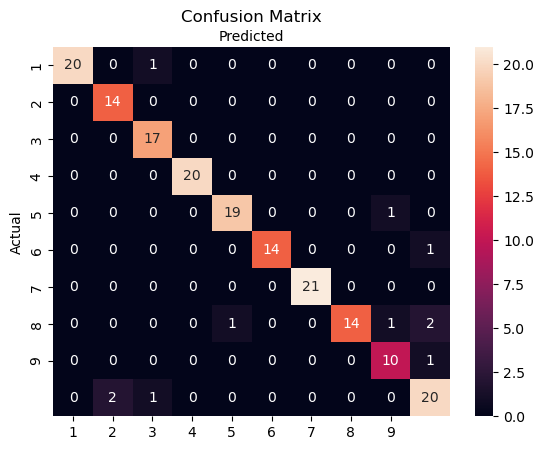

In [211]:
# your code here
from sklearn import metrics
import seaborn as sns
clf_final = ensemble.RandomForestClassifier(n_estimators = 129,
                                            min_samples_leaf = 20,
                                            max_leaf_nodes = 16,
                                            max_depth = 6)
clf_final.fit(X_train, Y_train)
#clf_final.score(X_test, Y_test)


cm = metrics.confusion_matrix(clf_final.predict(x_validate), y_validate)

sns.heatmap(cm, annot = True, xticklabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
            yticklabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.gca().xaxis.set_label_position('top')
plt.ylabel('Actual')
score = np.round(clf_final.score(x_validate, y_validate) * 100, 3)
print(f"The validation score for the final model is approximately {score}%")

## 3.8. Launch, Monitor and Maintain

Nothing to here for this lab. 

# Part D - Machine Learning in Particle Physics


## D1 - The Big Picture 

In this part, you will build a random forest machine learning model to recongnize types creating of top-quarks in a particle accelarator based on the observed products. We can use the decay products, energy, and momentum vectors to infer the presense of top-quarks. Beyond Standard Model Particle physics models often predict new types of particles so knowing whether the number of top-quarks (which have very high energy compared to other quarks) are as expected can be important for identifying when the Standard Model breaks down. 

Before you begin this experiment, read more about the dataset in Chapter 4, Section 4.1 of the Machine Learning for Physics and Astronomy in the PDF in the lab directory (also on Bruinlearn). 



## D2 - Get the Data

The dataset is included here in `ParticleID_features.csv`, the target is in `'ParticleID_labels.txt`. Our goal is to differentiate between the `4-top` events (Interactions of 4 top quark) from the `ttbar` events (interaction of top and anti-top quarks background events). 

In [12]:
## get the data

import pandas as pd
from pathlib import Path
path = Path.cwd() / "ParticleID_features (1).csv"
path2 = Path.cwd() / "ParticleID_labels.txt"
features = pd.read_csv(path)
targets = pd.read_csv(path2,header=None)
features.keys()

Index(['ID', 'MET', 'METphi', 'Type_1', 'P1', 'P2', 'P3', 'P4', 'Type_2', 'P5',
       'P6', 'P7', 'P8', 'Type_3', 'P9', 'P10', 'P11', 'P12', 'Type_4', 'P13',
       'P14', 'P15', 'P16', 'Type_5', 'P17', 'P18', 'P19', 'P20', 'Type_6',
       'P21', 'P22', 'P23', 'P24', 'Type_7', 'P25', 'P26', 'P27', 'P28',
       'Type_8', 'P29', 'P30', 'P31', 'P32', 'Type_9', 'P33', 'P34', 'P35',
       'P36', 'Type_10', 'P37', 'P38', 'P39', 'P40', 'Type_11', 'P41', 'P42',
       'P43', 'P44', 'Type_12', 'P45', 'P46', 'P47', 'P48', 'Type_13', 'P49',
       'P50', 'P51', 'P52'],
      dtype='object')

## D3 - Explore the data

In this lab, you have the freedom to decide what features you would like to use to train your model and how to clean and inpute your data. 

To help guide you, be sure to answer the following questions about the data. Read Chapter 4, Section 4.1 and 4.3 of the included PDF to learn more and get ideas of how to deal with cleaning the data and selecting good features to use. This chapter also has helpful pandas and sklearn code that will help make some of these tasks easier. Use the ``features.describe()`` to see the statistics of the columns of the ``features`` table. 

## Question 16
(4 pts)

1. What are the columns and what do they mean?
2. Why do some columns have more NaN's than others? 
3. Examine your target classes. What is the distribution of the number of training samples for the two classes? 
4. Make plots to explore some of the features that you are interested in using. 



1) The columns MET and METphi describe the missing transverse energy magnitude and angle, respectively. every type column describes the type of particle seen in the scattering event, and the 4 p columns after every type describe the 4 p vectors (x, y, z, t) of the particle.
2) Some columns have more NaNs because different scattering events have different numbers of particles involved. A scattering reaction with 13 different particles is vastly less probable than a scattering event with 2 particles. Then the columns associated with the 13th particle would have drastically more NaNs than the columns describing the first particle.

In [1]:
#----3----
targets = pd.read_csv('lab3/ParticleID_labels.txt',header=None)
targets[0] = targets[0].apply(lambda x: 0 if x == 'ttbar' else 1)
p_4top = sum(targets[0].to_numpy())
d1 = np.round(p_4top / len(targets[0]), 3) * 100
d2 = 100 - d1

print(f"In the dataset, the two classes are divided into {d1}% 4tops and {d2}% ttbars")

NameError: name 'pd' is not defined

In [241]:
featInterest = features[['MET', 'METphi', 'P1', 'P2', 'P3', 'P4',
                                          'P5', 'P6', 'P7', 'P8',
                                          'P9', 'P10', 'P11', 'P12',
                                          'P13', 'P14', 'P15', 'P16']]
featInterest = featInterest.fillna(0)

Text(0.5, 1.0, 'Feature Correlation Heatmap')

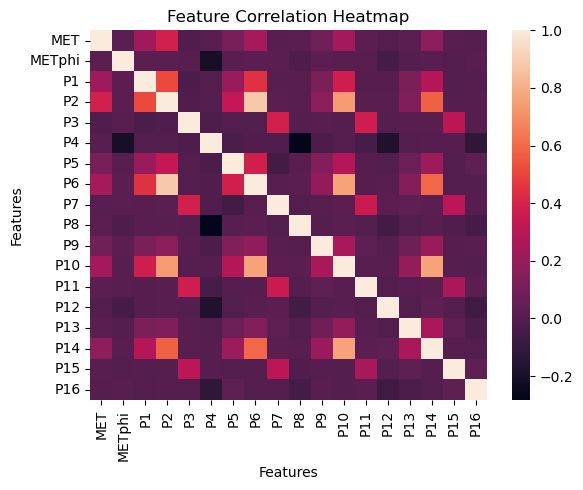

In [242]:
sns.heatmap(featInterest.corr())
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Feature Correlation Heatmap')

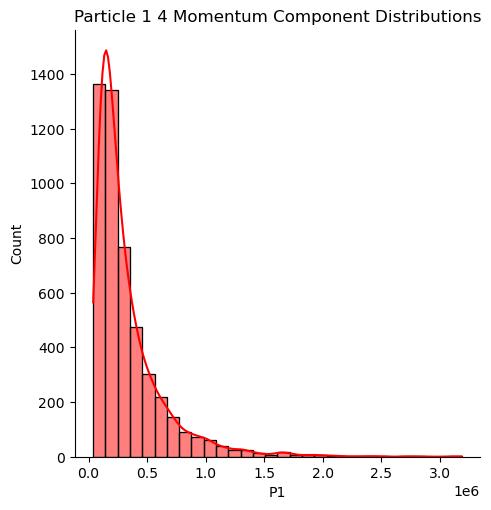

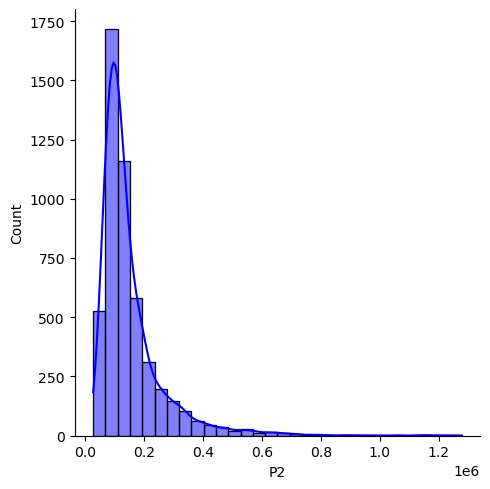

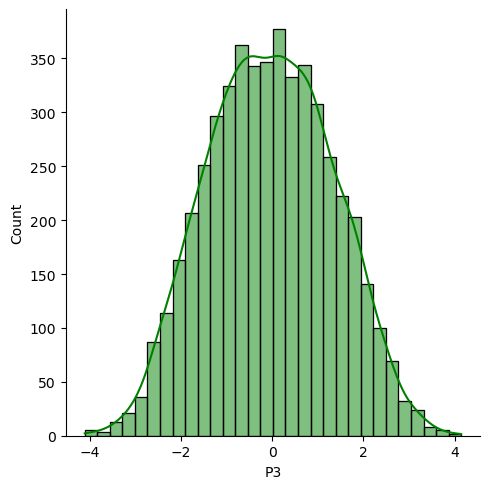

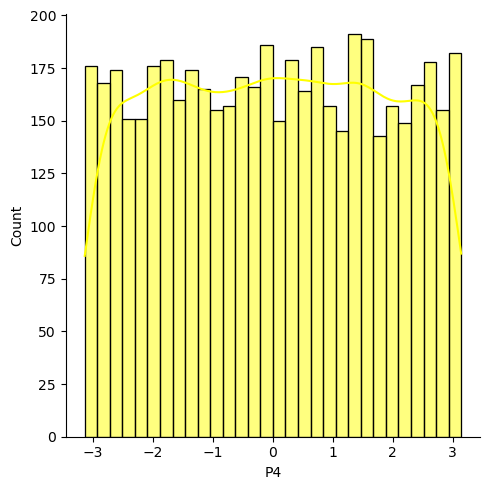

In [243]:
#---Particle 1 4 Momentum Distribution---

sns.displot(data = featInterest, x = "P1", bins = 30, kde = True, color = 'red')
plt.title('Particle 1 4 Momentum Component Distributions')
sns.displot(data = featInterest, x = "P2", bins = 30, kde = True, color = 'blue')
sns.displot(data = featInterest, x = "P3", bins = 30, kde = True, color = 'green')
sns.displot(data = featInterest, x = "P4", bins = 30, kde = True, color = 'yellow')

plt.show()

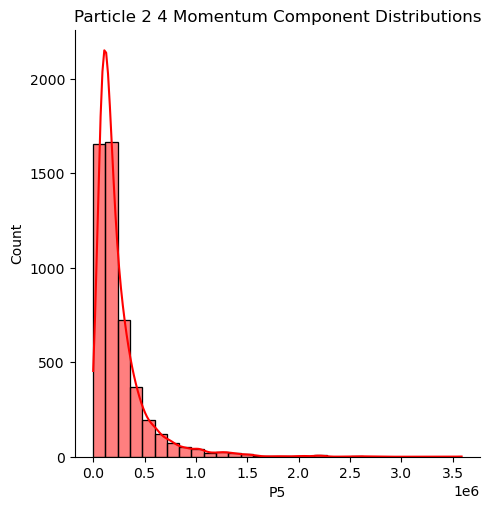

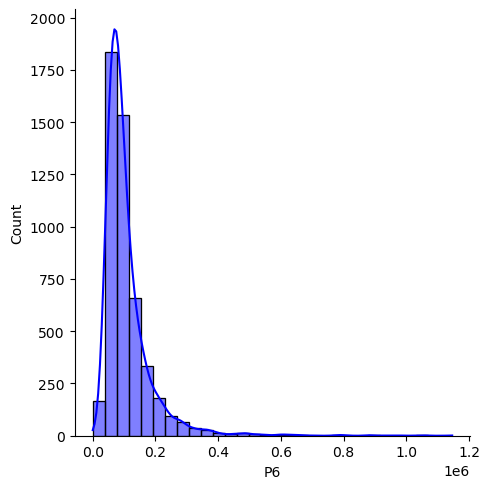

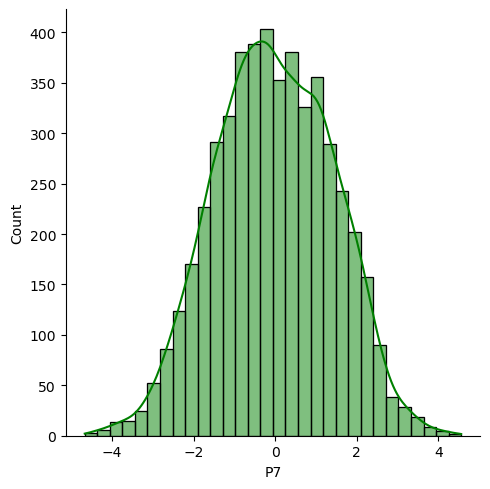

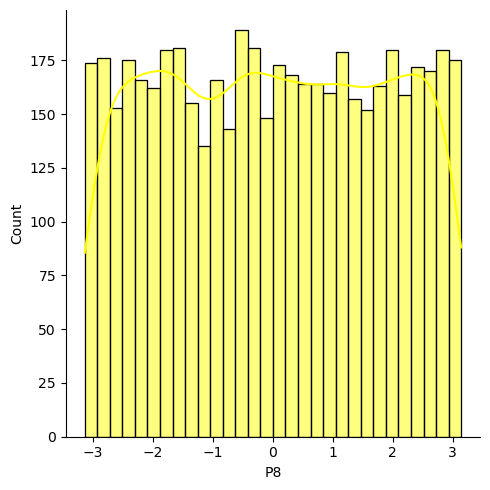

In [43]:
#---Particle 2 4 Momentum Distribution---

sns.displot(data = featInterest, x = "P5", bins = 30, kde = True, color = 'red')
plt.title('Particle 2 4 Momentum Component Distributions')
sns.displot(data = featInterest, x = "P6", bins = 30, kde = True, color = 'blue')
sns.displot(data = featInterest, x = "P7", bins = 30, kde = True, color = 'green')
sns.displot(data = featInterest, x = "P8", bins = 30, kde = True, color = 'yellow')

plt.show()

In [13]:
features

,ID,MET,METphi,Type_1,P1,P2,P3,P4,Type_2,P5,...,Type_12,P45,P46,P47,P48,Type_13,P49,P50,P51,P52
0,0,62803.5,-1.810010,j,137571.0,128444.0,-0.345744,-0.307112,j,174209.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,57594.2,-0.509253,j,161529.0,80458.3,-1.318010,1.402050,j,291490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,82313.3,1.686840,b,167130.0,113078.0,0.937258,-2.068680,j,102423.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,30610.8,2.617120,j,112267.0,61383.9,-1.211050,-1.457800,b,40647.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,45153.1,-2.241350,j,178174.0,100164.0,1.166880,-0.018721,j,92351.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,269074.0,-1.274730,j,495577.0,362590.0,-0.791914,1.671250,b,328278.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,4996,12385.8,0.986871,j,258932.0,133559.0,-1.276540,2.970100,j,87822.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,4997,32762.8,3.057630,b,122222.0,79947.8,0.983920,-0.399231,j,260623.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,4998,104474.0,-1.875250,b,791028.0,457589.0,1.141530,2.934810,b,304661.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
features.describe()

,ID,MET,METphi,P1,P2,P3,P4,P5,P6,P7,...,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,4.997000e+03,4.997000e+03,4997.000000,...,261.000000,261.000000,1.270000e+02,127.000000,127.000000,127.000000,5.600000e+01,56.000000,56.000000,56.000000
mean,2499.500000,64071.074332,-0.028916,3.301357e+05,1.540486e+05,-0.039812,-0.003049,2.527799e+05,1.080302e+05,-0.029936,...,0.029455,0.026422,1.631051e+05,34876.849606,0.206978,-0.001085,1.456600e+05,36151.183929,-0.000879,0.219260
std,1443.520003,60525.122480,1.819257,3.068202e+05,1.149469e+05,1.361762,1.814855,2.638580e+05,8.136261e+04,1.439105,...,1.884750,1.753017,2.248603e+05,20433.767238,1.998859,1.949004,1.943657e+05,25861.883410,1.941707,1.910400
min,0.000000,290.756000,-3.141010,3.857940e+04,2.825400e+04,-4.110220,-3.140710,1.087540e+04,1.080000e+04,-4.668790,...,-4.400470,-3.130690,1.780380e+04,12987.900000,-4.447660,-3.139820,2.512510e+04,14836.000000,-4.448760,-2.990730
25%,1249.750000,24352.375000,-1.619905,1.369522e+05,8.883690e+04,-1.035570,-1.574213,1.007510e+05,6.321840e+04,-1.060500,...,-1.413650,-1.270700,4.365005e+04,24742.500000,-1.259230,-1.817600,4.112588e+04,24974.125000,-1.243362,-1.490900
50%,2499.500000,46814.400000,-0.055612,2.263525e+05,1.182015e+05,-0.038731,-0.009037,1.659740e+05,8.584360e+04,-0.057428,...,-0.088908,-0.041002,8.050910e+04,28262.800000,0.120301,-0.232455,9.553645e+04,27353.550000,-0.121213,0.128103
75%,3749.250000,83032.350000,1.537323,4.077158e+05,1.771265e+05,0.943598,1.542370,2.999950e+05,1.238700e+05,1.028340,...,1.416310,1.514030,1.578350e+05,35445.700000,1.727295,1.712720,1.754910e+05,33817.950000,1.800682,1.984745
max,4999.000000,692674.000000,3.141130,3.186360e+06,1.276710e+06,4.141410,3.138540,3.587700e+06,1.146330e+06,4.559150,...,4.790720,3.120760,1.246080e+06,167840.000000,4.691500,3.091510,1.177730e+06,155888.000000,4.151320,3.058890


In [8]:
targets

,0
0,ttbar
1,ttbar
2,ttbar
3,ttbar
4,ttbar
...,...
4995,4top
4996,ttbar
4997,ttbar
4998,4top


## D4 - Prepare the Data

Here, you'll be selecting the features and creating your training, testing, and validating data. Again, Chapter 4, Section 4.1 and 4.3 will be helpful for this. 

## Question 17
(6 pts)

1. Choose at least 5 features to use in your random forest model and justfy why you think these are helpful features.
2. Do you need to clean these features? Are there invalid or missing values that you need to deal with? If so describe your method for dealing with them. 
3. Split your dataset into training, testing, and validation. You are free to choose what fraction you would like to use for each. 


1) I plan on using the first 3 particle 4 vector components in my random forest model, along with the MET and MTE angle. I believe that these features will be the most helpful because they cover the simplest scattering interaction, which means they will retain the most data. I think every component of the 4 vectors is required since missing a single 4 vector may lead to unaccounted neergy, which may lead to incorrect classifications.
2) I plan on cleaning the features by dropping the NaN features because the particle type may not exist.

In [264]:
featLim = features[['MET', 'METphi', 'P1', 'P2', 'P3', 'P4',
                                     'P5', 'P6', 'P7', 'P8',
                                     'P9', 'P10', 'P11', 'P12']]
featLim = pd.concat([featLim, targets], axis = 1)

nullCount = featLim.isnull()
print(f"There are {nullCount.any().sum()} NaN values in the limited dataset")
featLim = featLim.dropna()

There are 8 NaN values in the limited dataset


np.int64(811)

In [274]:
#---Part 3---
# I understand its cut off but I chose 10% validation and 20% testing splits
x_train_all, x_validate, y_train_all, y_validate = model_selection.train_test_split(featLim.drop(0, axis = 1), featLim[0], test_size=0.1)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x_train_all, y_train_all, test_size=0.2)

## D5 - Select model and train

## Question 18
(3 pts)

Use a random forest classifier to train a model to classify `4-top` and ``ttbar`` events. 

In [275]:
clf_particle = ensemble.RandomForestClassifier()
clf_particle.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Performance and evaluation metrics


## Question 19
(6 pts)

- First, compute the accuracy score of your random forest classifier. Based on the ratio of ``4-top`` samples compared to the ``ttbar`` class, what accuracy would you expect if you always guess ``ttbar``?
- Use ``sklearn.metrics.classification_report`` to compute some other common metrics. Descibe what each metric means. 
- Compute the confusion matrix and plot it.

The two classes are divided into 16.2% 4tops and 83.8% ttbars. If a model were to only guess ttbars, I would expect the model to be correct approximately 80-85% of the time.

In [276]:
print(metrics.classification_report(Y_test, clf_particle.predict(X_test)))
score = round(clf_particle.score(X_test, Y_test) * 100, 3)
print(f"The model without hyperparamter optimization was correct {score}% of the time")

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       760
           1       0.72      0.52      0.60       131

    accuracy                           0.90       891
   macro avg       0.82      0.74      0.77       891
weighted avg       0.89      0.90      0.89       891

The model without hyperparamter optimization was correct 90.011% of the time


Precision measures the rate at which the model was correct when labeling any target (True Positive/True Positive + False Positive) </br>
Recall measures the percentage of all actual positives that were correctly classified (True Positive / True Positive + False Negative) </br>
The f1-score is a measure of how well the model classifies targets. </br>
Support measures the number of targets in the actual dataset.

## D6 - Fine tune your model

## Question 20
(6 pts)

Re-run your random forest classifier with other choices for hyper-parameters. Are there better choies of hyper-parameters? Describe your final model and justify your choices. 

In [277]:
paramGrid = {
"n_estimators": np.arange(1, 251).tolist(),
"max_depth": np.arange(4, 20).tolist(),
"min_samples_leaf": np.arange(10, 101).tolist(),
"max_leaf_nodes": np.arange(10, 201).tolist()
}

grid_search = model_selection.RandomizedSearchCV(estimator = clf_particle,
                                                 param_distributions = paramGrid,
                                                 cv = 5, n_jobs = 1)
grid_search.fit(X_train, Y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")

Best hyperparameters: {'n_estimators': 38, 'min_samples_leaf': 30, 'max_leaf_nodes': 26, 'max_depth': 16}
Best accuracy: 0.8790685030808263


In [278]:
clf_best = ensemble.RandomForestClassifier(n_estimators = 38,
                                           min_samples_leaf = 30,
                                           max_leaf_nodes = 26,
                                           max_depth = 16)
clf_best.fit(X_train, Y_train)
clf_best.score(X_test, Y_test)
print(metrics.classification_report(Y_test, clf_best.predict(X_test), zero_division = True))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       760
           1       0.71      0.50      0.59       131

    accuracy                           0.90       891
   macro avg       0.81      0.73      0.77       891
weighted avg       0.89      0.90      0.89       891



Despite running the randomized search multiple times, there does not seem to be many hyperparameters better than the default selection for this data. I chose the hyperparameters based on the optimized hyperparameters found by the randomized search. However, they do not seem to yield higher f-scores than the default.

## D7 - Present your solution


## Question 21
(6 pts)

Describe the performance of your model on the validation data set. Describe two improvements that one could make in this work in the future (for example how to improve: data collection, feature engineering, data cleaning, model buiding, etc.). 

In [283]:
score = round(clf_best.score(x_validate, y_validate) * 100, 3)
print(f"The final model has a validation score of approximately {score}%.")

The final model has a validation score of approximately 88.283%.


I believe that the work can be improved by combining the 4-momentum features into 2 components based on momentum magnitude and time since it would reduce the number of features in the model, allowing for more features to be used in the decision tree model without sacrificing computational time. I would also improve the model itself by running a gridsearch on a more focused selection of hyperparameters. In my curent model, I run a shotgun spread on hyperparameters using random search, which may mean I am failing to find the optimal set of hyperparameters to improve the model beyond the default hyperparameters offered in scikit. Another aspect of the model that could have been improves was the dat acleaning process as I had made no attempt ot clean the data outside of removign the NaN values, which could have led to errors with the outliers.

# Submit your lab

You're done! Congrats!